In [1]:
# import system libraries
import sys
import os

# import Data Libraries
import pandas as pd
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import image_transforms
from image_loader import images_from_dir
from image_loader import image_data_loader

# Model Functions
from resnet50 import Resnet50

# torch temp
import torch.nn as nn
import torch.optim as optim

In [2]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = 'dogImages/'

# Set subfolders for train, val & test
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [3]:
train_loader = image_data_loader(images_from_dir(train_dir,
                image_transforms(img_size)),
                  batch_size,
                  num_workers,
                  True)

val_loader = image_data_loader(images_from_dir(val_dir,
                image_transforms(img_size)),
                  batch_size,
                  num_workers,
                  False)

test_loader = image_data_loader(images_from_dir(test_dir,
                image_transforms(img_size)),
                  batch_size,
                  num_workers,
                  False)

In [4]:
data_loaders = {
    'train':train_loader,
    'valid':val_loader,
    'test':test_loader,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(70)


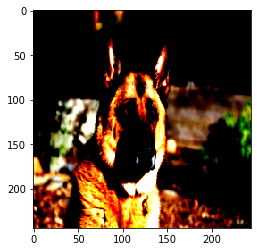

In [5]:
# Check how images are loaded
images, labels = next(iter(train_loader))

# Display image and label
plt.imshow(images[0].permute(1, 2, 0))
print(labels[0])

In [6]:
# Model Parms
num_classes = 133
n_epochs = 2

In [7]:
res_model = Resnet50(num_classes, True)

In [8]:
# Model training Params
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(res_model.get_model().fc.parameters(), lr=0.001)

In [10]:
# train the model
model_transfer = res_model.train(n_epochs, data_loaders, optimizer_transfer, criterion_transfer, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

'Epoch #2, Batch #209 train_loss: 4.671187'

SAVE MODEL: val_loss decrease (4.597442)
